## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

## Reading the CSV File

In [2]:
dataset = pd.read_csv('D:/Masters/Machine Learning/Assignment/278k_song_labelled.csv')

In [3]:
dataset.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [4]:
dataset.tail()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1
277937,277937,241920.0,0.779,0.870,-13.141,0.0574,0.00644,0.010700,0.0399,0.555,102.689,2.372685e-07,1


## Data Preprocessing

Checking for any missing values in dataset.

In [5]:
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64


In [6]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [7]:
# number of duplicates rows
dataset.duplicated().sum()

1678

In [8]:
# drop duplicats rows
dataset.drop_duplicates(inplace=True)

In [9]:
# number of duplicates rows
dataset.duplicated().sum()

0

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276260 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     276260 non-null  float64
 1   danceability      276260 non-null  float64
 2   energy            276260 non-null  float64
 3   loudness          276260 non-null  float64
 4   speechiness       276260 non-null  float64
 5   acousticness      276260 non-null  float64
 6   instrumentalness  276260 non-null  float64
 7   liveness          276260 non-null  float64
 8   valence           276260 non-null  float64
 9   tempo             276260 non-null  float64
 10  spec_rate         276260 non-null  float64
 11  labels            276260 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 27.4 MB


In [11]:
dataset.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


## Feature Selection

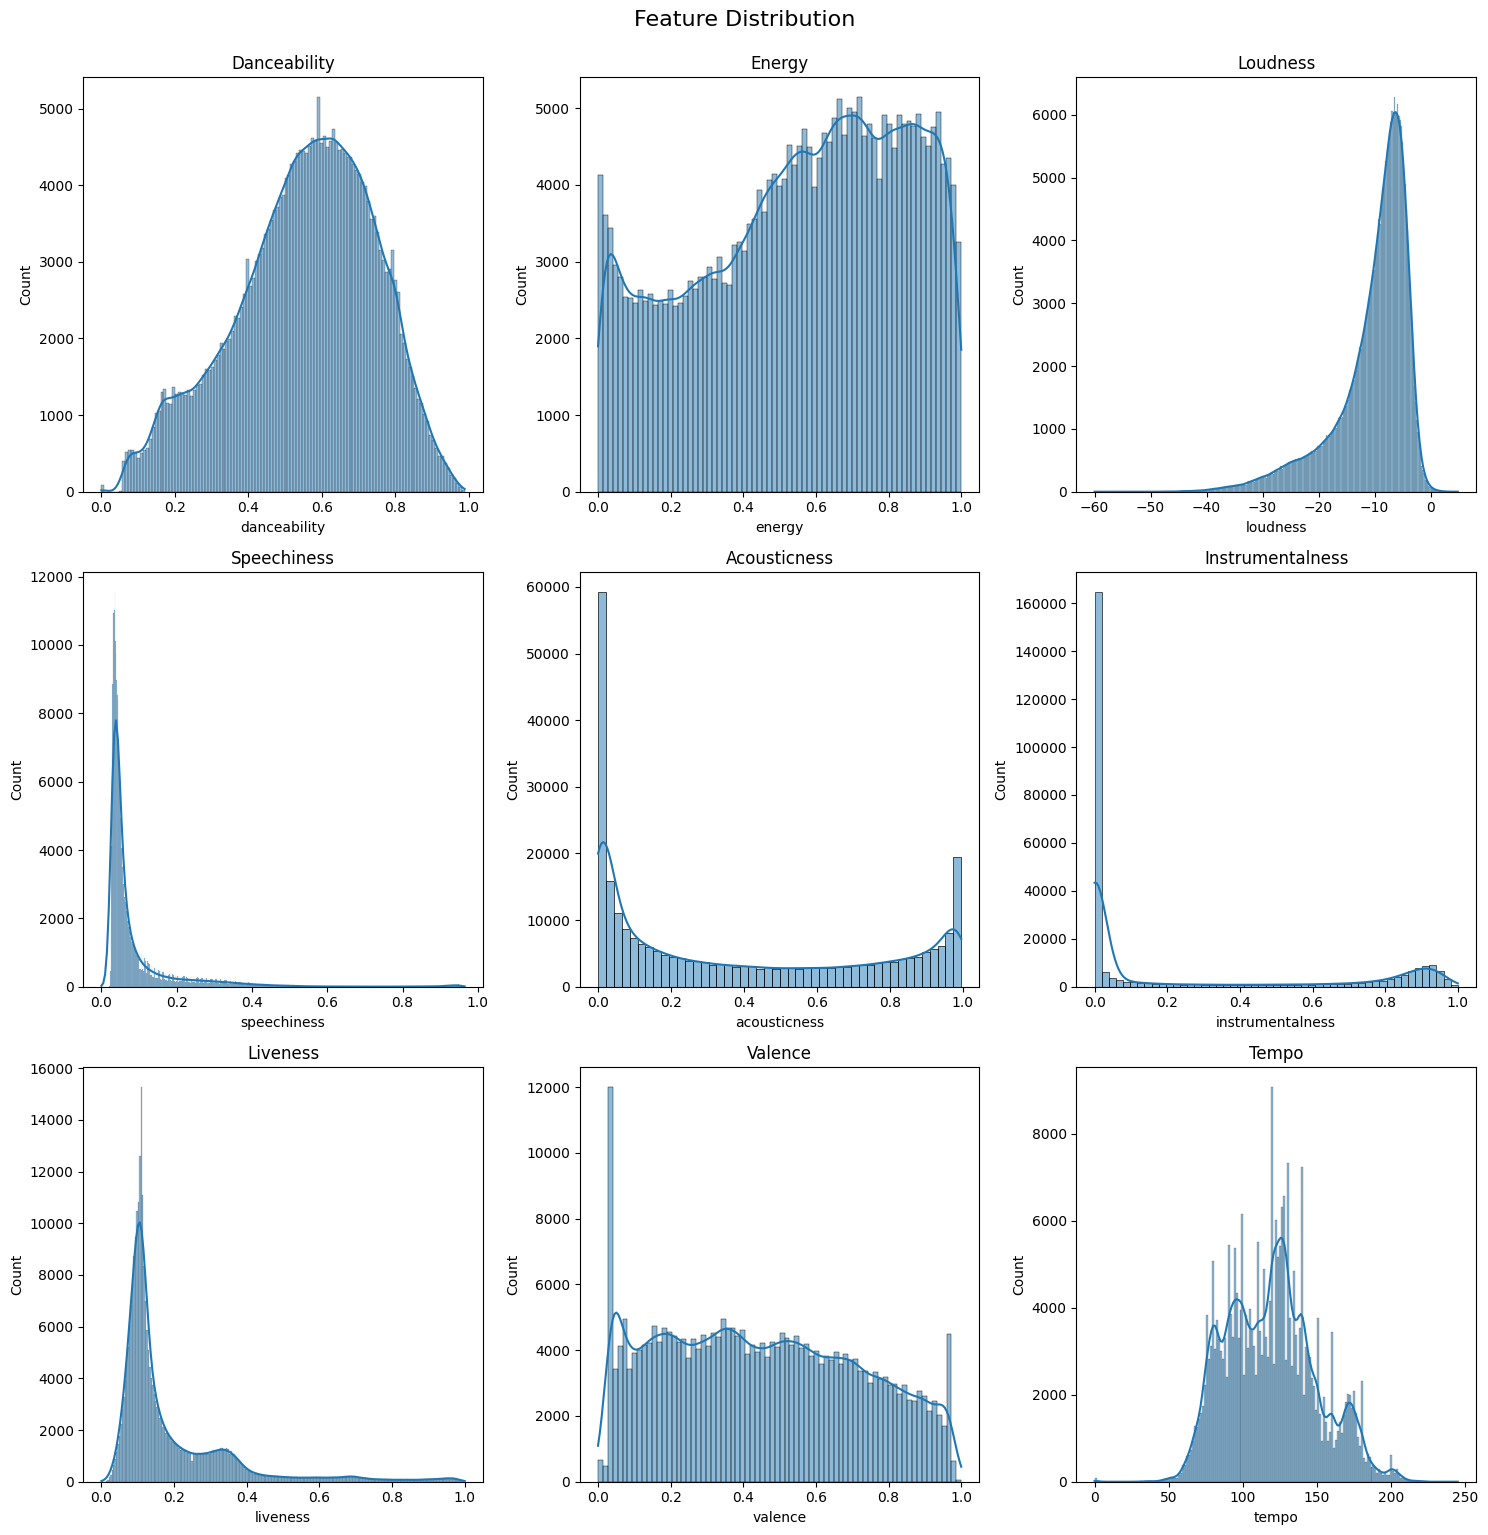

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(dataset[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(feature.capitalize())

plt.tight_layout()
plt.suptitle('Feature Distribution', fontsize=16, y=1.02)
plt.show()

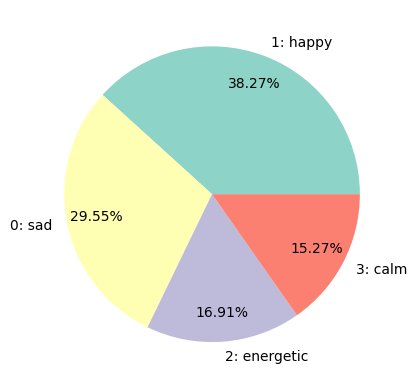

In [13]:
my_labels = {0:'0: sad',1:'1: happy',2:'2: energetic', 3: '3: calm'}
s = dataset.labels.map(my_labels).value_counts()

plt.pie(s, labels=s.index, autopct= '%1.2f%%',pctdistance=0.8, colors=sns.color_palette('Set3') )

plt.show()

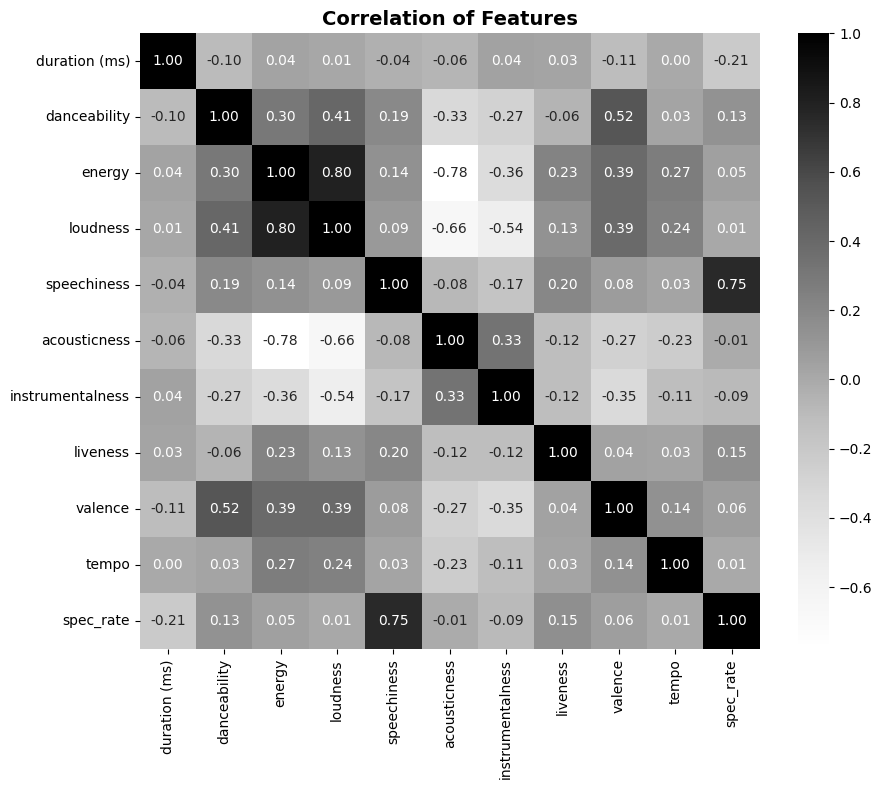

In [14]:
corr = dataset.drop(['labels'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Grays', fmt=".2f")
plt.title('Correlation of Features', fontsize=14, fontweight='bold')
plt.show()

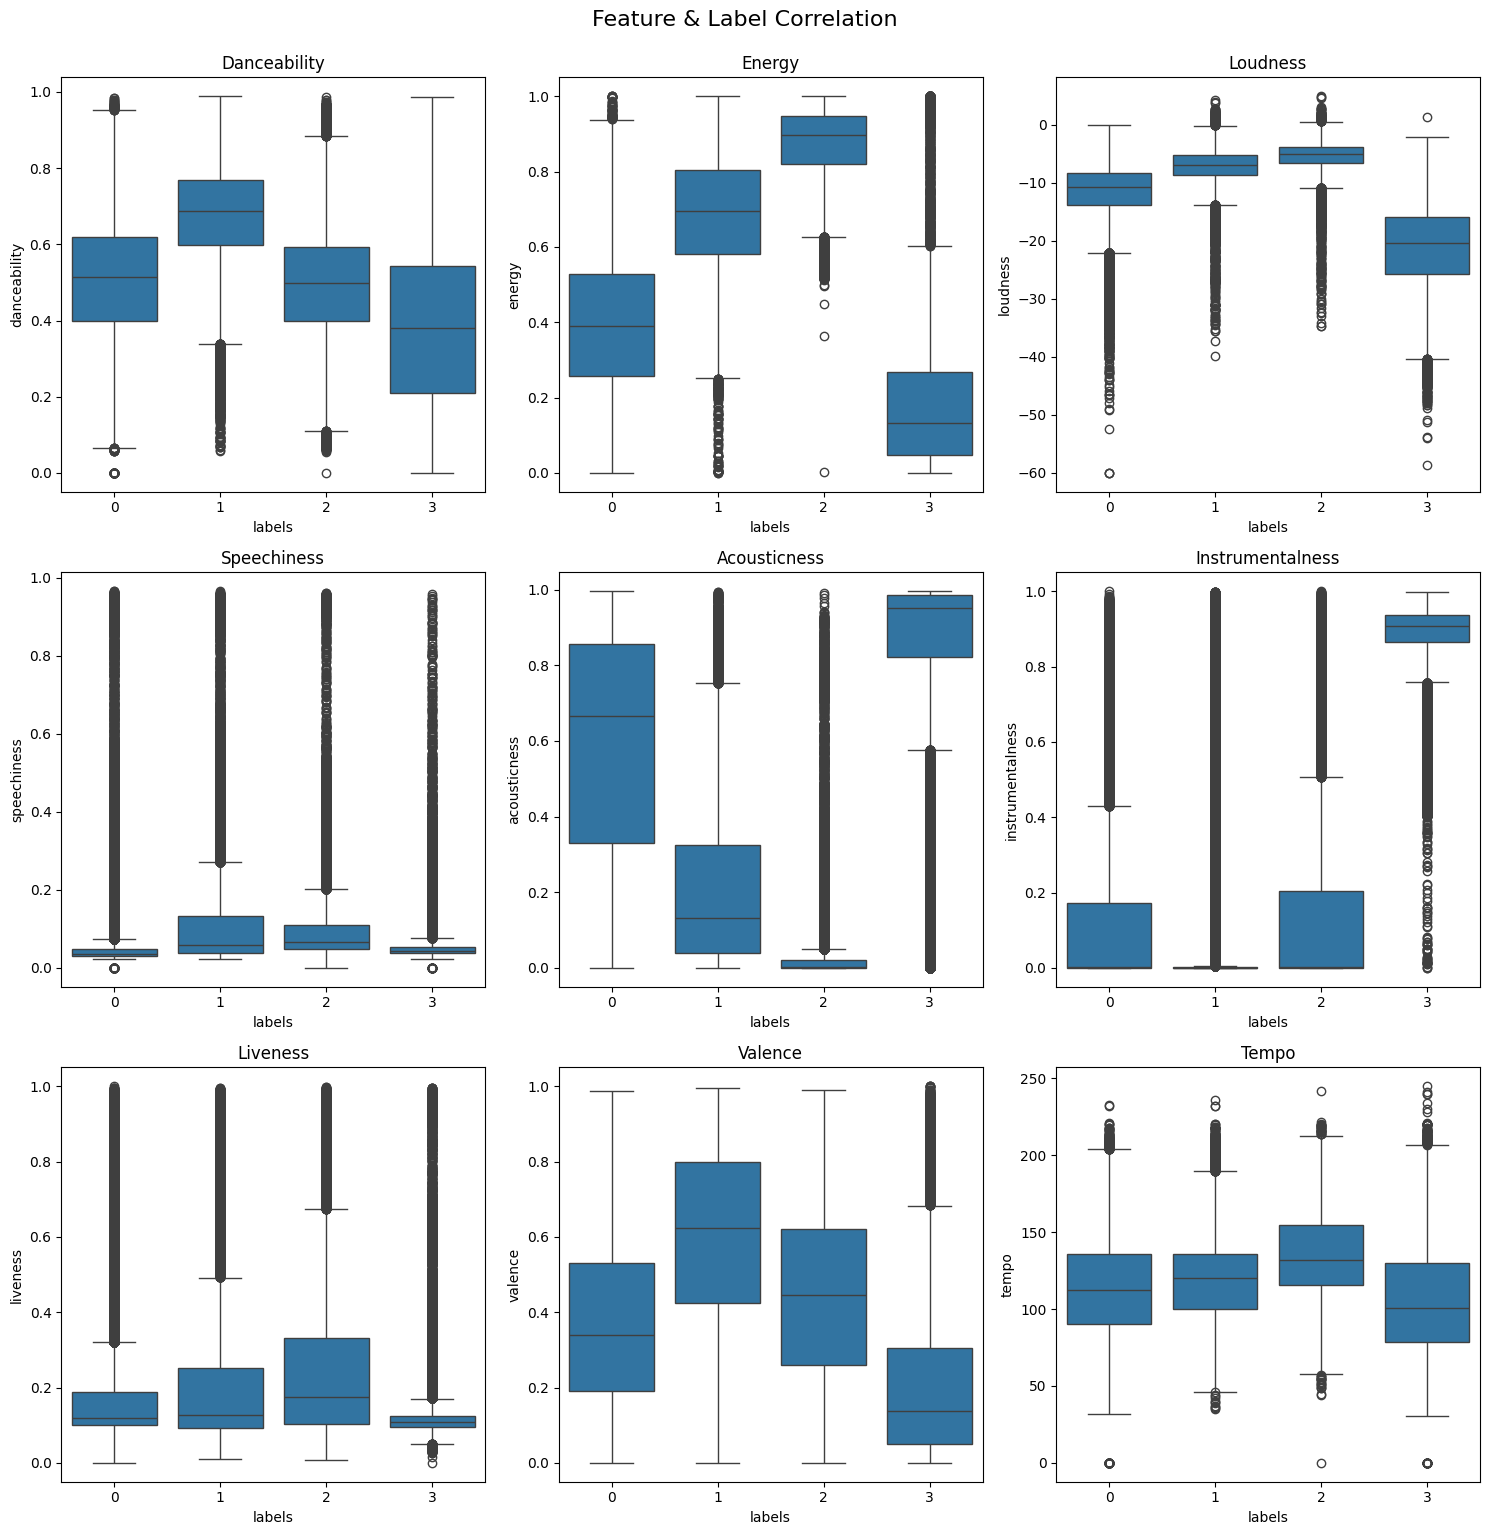

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='labels', y=feature, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(feature.capitalize())

plt.tight_layout()
plt.suptitle('Feature & Label Correlation', fontsize=16, y=1.02)
plt.show()

In [16]:
# Removing 'labels' and storing rest as features in X and storing target variable, "lables" in y
X = dataset.drop(['labels'], axis=1)
y = dataset['labels']
X_Columns = X

In [17]:
X.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07


## Scaling all features

In [18]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

## Splitting Data into Training and Testing Set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [20]:
X_train.shape

(193382, 11)

In [21]:
X_test.shape

(82878, 11)

In [22]:
y_train.shape

(193382,)

In [23]:
y_test.shape

(82878,)

## Model Training

### Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

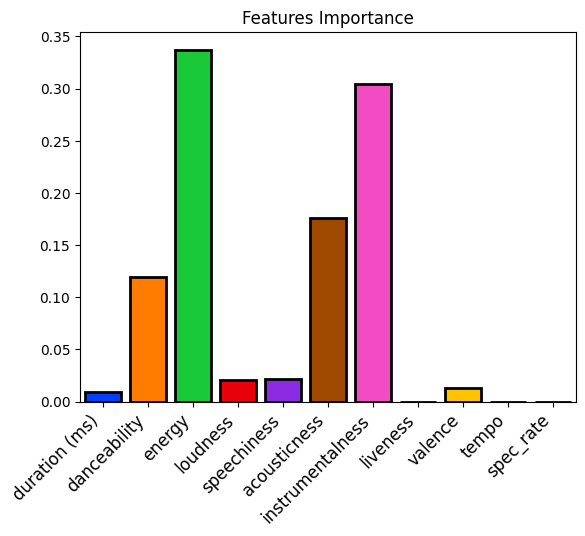

In [25]:
importances = dt_model.feature_importances_
columns = X_Columns.columns
df_plot = pd.DataFrame(np.array([importances]), columns = columns)


sns.barplot(data=df_plot, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.xticks(rotation=45, horizontalalignment='right', fontweight="light", fontsize="large")
plt.title('Features Importance')
plt.show()

### Decision Tree Evaluation

In [26]:
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
accuracy_dt_percentage = accuracy_dt * 100
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt_percentage))

report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report: \n", report_dt)

Decision Tree Accuracy: 0.8485364029054755
Decision Tree Accuracy: 84.85%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84     24584
           1       0.83      0.86      0.84     31792
           2       0.85      0.75      0.80     13886
           3       0.95      0.91      0.93     12616

    accuracy                           0.85     82878
   macro avg       0.86      0.84      0.85     82878
weighted avg       0.85      0.85      0.85     82878



### Top 4 features Decision tree

In [27]:
X_feature = dataset.drop(['labels', 'duration (ms)', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'spec_rate'], axis=1)

In [28]:
X_feature.head()

,danceability,energy,acousticness,instrumentalness
0,0.611,0.614,0.0169,0.000794
1,0.638,0.781,0.0118,0.009530
2,0.560,0.810,0.0071,0.000008
3,0.525,0.699,0.0178,0.000088
4,0.367,0.771,0.3650,0.000001


In [29]:
#X_feature = scaler.fit_transform(X_feature)

In [30]:
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X_feature, y, train_size=0.7, test_size=0.3, random_state=42)

In [31]:
dt_model_feature = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model_feature.fit(X_feature_train, y_feature_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [32]:
y_pred_dt_feature = dt_model_feature.predict(X_feature_test)

accuracy_dt_feature = accuracy_score(y_feature_test, y_pred_dt_feature)
print("Decision Tree Accuracy:", accuracy_dt_feature)
accuracy_dt_percentage_feature = accuracy_dt_feature * 100
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt_percentage_feature))

report_dt_feature = classification_report(y_feature_test, y_pred_dt_feature)
print("Classification Report: \n", report_dt_feature)

Decision Tree Accuracy: 0.8392335722387123
Decision Tree Accuracy: 83.92%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     24584
           1       0.83      0.86      0.84     31792
           2       0.80      0.78      0.79     13886
           3       0.92      0.90      0.91     12616

    accuracy                           0.84     82878
   macro avg       0.85      0.84      0.84     82878
weighted avg       0.84      0.84      0.84     82878



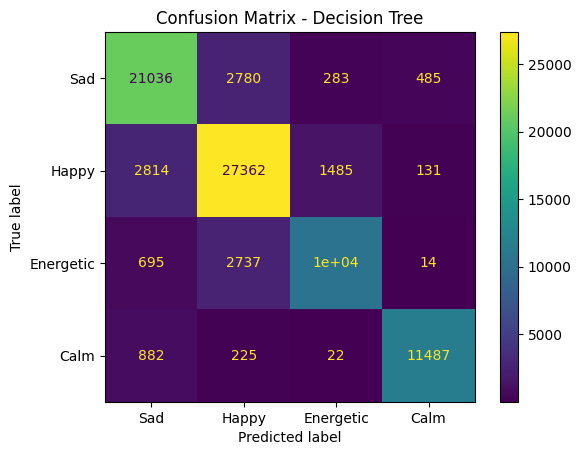

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Sad', 'Happy', 'Energetic', 'Calm'])
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

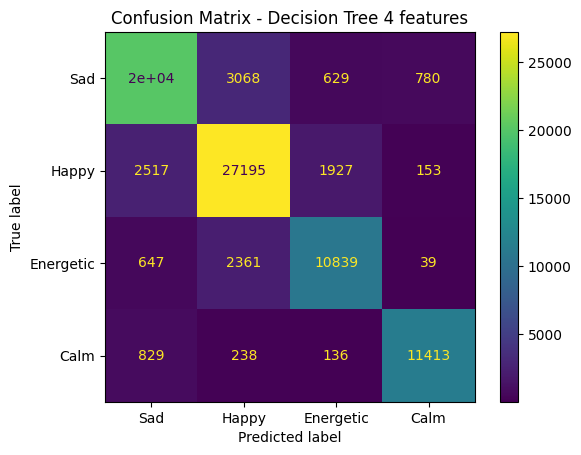

In [34]:
# Confusion Matrix 4 features
conf_matrix = confusion_matrix(y_feature_test, y_pred_dt_feature)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Sad', 'Happy', 'Energetic', 'Calm'])
disp.plot()
plt.title("Confusion Matrix - Decision Tree 4 features")
plt.show()

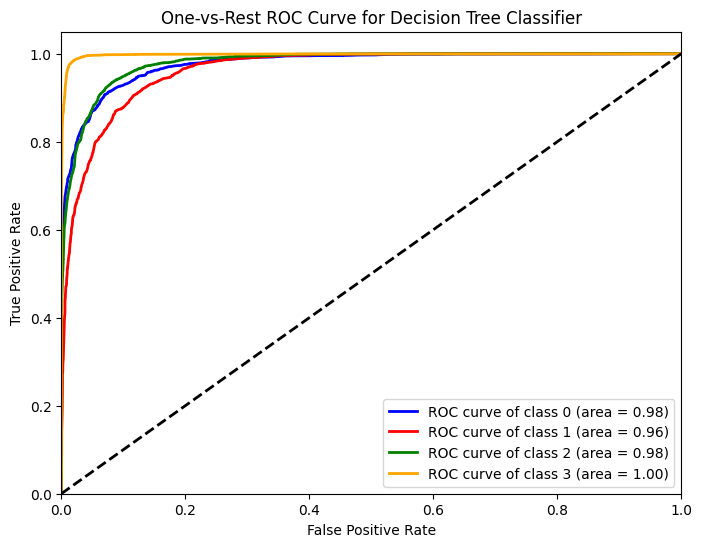

In [35]:
# Encode target variable into binary format
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Fit One-vs-Rest classifier using Decision Tree
clf_ovr = OneVsRestClassifier(dt_model)
clf_ovr.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = clf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

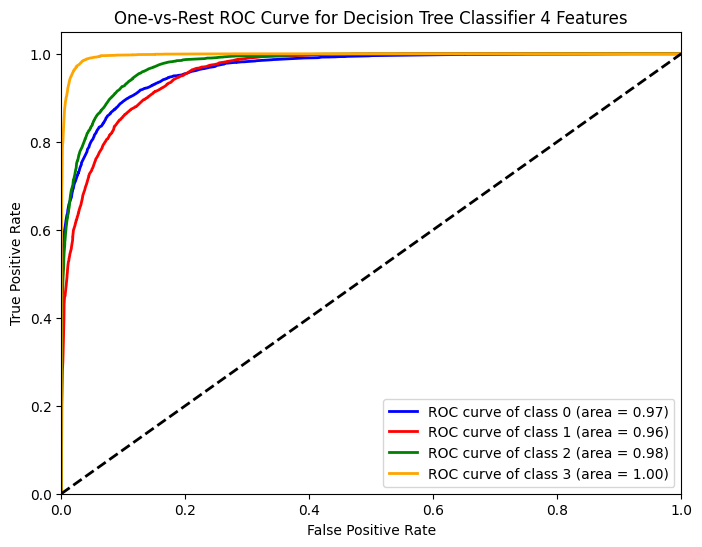

In [36]:

# Encode target variable into binary format
y_bin = label_binarize(y_feature_test, classes=np.unique(y_feature_test))
n_classes = y_bin.shape[1]

# Fit One-vs-Rest classifier using Decision Tree
clf_ovr = OneVsRestClassifier(dt_model_feature)
clf_ovr.fit(X_feature_train, y_feature_train)

# Predict probabilities for each class
y_scores = clf_ovr.predict_proba(X_feature_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Decision Tree Classifier 4 Features')
plt.legend(loc="lower right")
plt.show()

#### Overfitting and Underfitting

In [37]:
print('Overfitting and Underfitting Check Gini')
print('Training set score: {:.4f}'.format(dt_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt_model.score(X_test, y_test)))

Overfitting and Underfitting Check Gini
Training set score: 0.8473
Test set score: 0.8485


### K-Nearest Neighbors (KNN)

In [38]:
# Model Training
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# Model Evaluation
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
accuracy_knn_percentage = accuracy_knn * 100
print("KNN Accuracy: {:.2f}%".format(accuracy_knn_percentage))



report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report: \n", report_knn)

KNN Accuracy: 0.41926687420063224
KNN Accuracy: 41.93%
Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.46      0.41     24584
           1       0.46      0.57      0.51     31792
           2       0.30      0.15      0.20     13886
           3       0.57      0.27      0.36     12616

    accuracy                           0.42     82878
   macro avg       0.42      0.36      0.37     82878
weighted avg       0.42      0.42      0.40     82878



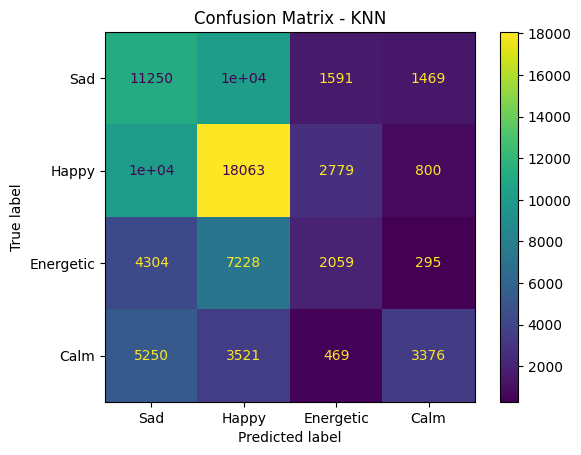

In [40]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Sad', 'Happy', 'Energetic', 'Calm'])
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

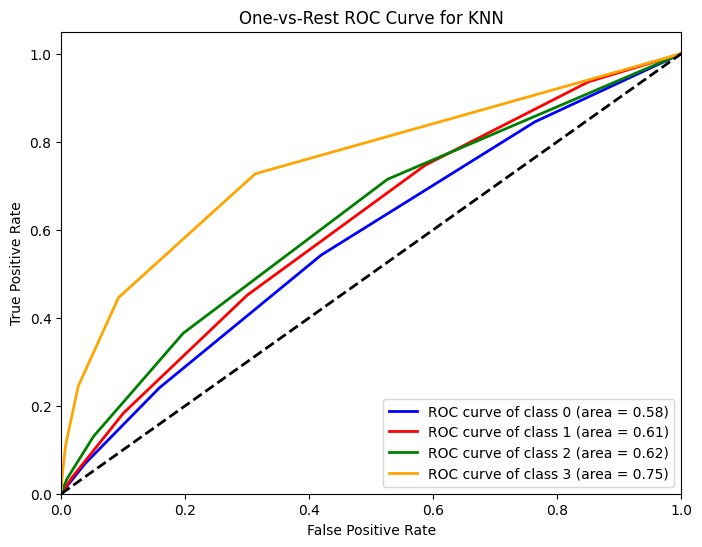

In [41]:
# Encode target variable into binary format
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Fit One-vs-Rest classifier using Decision Tree
clf_ovr = OneVsRestClassifier(knn_model)
clf_ovr.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = clf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [42]:
print('Overfitting and Underfitting Check KNN')
print('Training set score: {:.4f}'.format(knn_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_model.score(X_test, y_test)))

Overfitting and Underfitting Check KNN
Training set score: 0.5989
Test set score: 0.4193


### Support Vector Machine (SVM)

In [ ]:
# Model Training
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

In [ ]:
# Model Evaluation
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy: {:.2f}%".format(accuracy_svm_percentage))

report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report: \n", report_svm)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Sad', 'Happy', 'Energetic', 'Calm'])
disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
print('Overfitting and Underfitting Check SVM')
print('Training set score: {:.4f}'.format(svm_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test, y_test)))

### Naive Bayes

In [ ]:
# Model Training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

In [ ]:
# Make predictions on the validation set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the performance of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
accuracy_nb_percentage = accuracy_nb * 100
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb_percentage))

report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report: \n", report_nb)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Sad', 'Happy', 'Energetic', 'Calm'])
disp.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [ ]:
# Encode target variable into binary format
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Fit One-vs-Rest classifier using Decision Tree
clf_ovr = OneVsRestClassifier(naive_bayes)
clf_ovr.fit(X_train, y_train)

# Predict probabilities for each class
y_scores = clf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Overfitting and Underfitting Check Naive Bayes')
print('Training set score: {:.4f}'.format(naive_bayes.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(naive_bayes.score(X_test, y_test)))